# Exercice 1


Mise en Situation Professionnelle : Extraction et Analyse des Données d'un Site Web

Contexte :

Vous travaillez en tant que Data Analyst pour une entreprise spécialisée dans la vente de livres en ligne. Votre responsable vous a demandé d'analyser le marché en ligne des livres en scrappant les données de plusieurs sites web pour identifier les tendances de prix et de notation des livres. Pour cette tâche, vous décidez d'utiliser le site fictif "Books to Scrape" (http://books.toscrape.com/) pour extraire les informations nécessaires.

Votre objectif est d'automatiser le processus de collecte des données en extrayant les titres, prix, et notes des livres disponibles sur plusieurs pages du site. Une fois les données collectées, vous devez les analyser pour produire des graphiques qui montreront la distribution des prix et des notations des livres.

Étapes de l'Exercice :

    Extraction des Données de la Page Principale :
        Utilisez le module requests pour envoyer une requête HTTP au site "Books to Scrape" et récupérez le contenu HTML de la page principale.
        Parsez le contenu HTML avec BeautifulSoup pour identifier les éléments contenant les informations sur les livres (titres, prix, notation).
        Stockez ces informations dans un dictionnaire avec des listes pour chaque attribut (titre, prix, notation).

    Analyse des Données Extraites :
        Convertissez le dictionnaire en un DataFrame avec pandas pour faciliter l'analyse.
        Créez un histogramme de la distribution des prix des livres.
        Produisez un graphique en barres pour visualiser le nombre de livres par notation (étoiles).

    Scraping de Plusieurs Pages (Exercice Annexe) :
        Étendez votre code pour scraper plusieurs pages du site (par exemple, 50 pages).
        Compilez les informations de toutes les pages dans un seul DataFrame.
        Répétez les analyses précédentes (histogramme des prix et graphique des notations) sur l'ensemble des données collectées.

    Simplification de l'Exercice :
        Étape de Base : Vous pouvez commencer par scraper uniquement la première page du site et analyser un petit échantillon de livres.
        Étape Avancée : Scraper plusieurs pages et comparer les résultats avec ceux de la première page pour voir comment les tendances changent avec l'augmentation du volume de données.

Livrables :

    Un script Python fonctionnel qui extrait les données du site "Books to Scrape".
    Un DataFrame contenant les titres, prix, et notations des livres.
    Des graphiques montrant la distribution des prix et des notations des livres.
    Un rapport succinct résumant les conclusions basées sur les analyses des données collectées.


## Solution beautifull soup

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
import requests

url = "http://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


In [3]:
books_html = soup.find_all("article", class_="product_pod")


In [4]:
books_html[1]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/></a>
</div>
<p class="star-rating One">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>
<div class="product_price">
<p class="price_color">£53.74</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [5]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [6]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

In [7]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [8]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [9]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [10]:
def parse_rating(rating_classes):
    if 'One' in rating_classes:
        return 1
    elif 'Two' in rating_classes:
        return 2
    elif 'Three' in rating_classes:
        return 3
    elif 'Four' in rating_classes:
        return 4
    elif 'Five' in rating_classes:
        return 5
    else:
        return 0
    
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

In [11]:
price = books_html[0].find("p", class_="price_color")
price

<p class="price_color">£51.77</p>

In [12]:
price.attrs['class']

['price_color']

In [13]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [14]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [15]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<Axes: xlabel='Rating'>

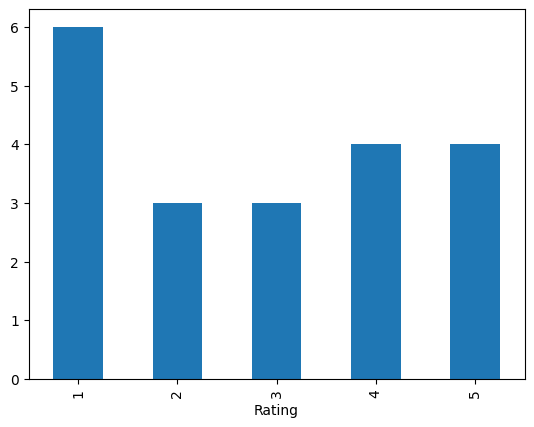

In [16]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")